In [1]:
import pandas as pd
import numpy as np
import csv
pd.set_option('display.max_columns', 380)
pd.set_option('display.width', 140)
pd.set_option('display.max_rows', 380)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [2]:
original_data = pd.read_excel("Absenteeism_at_work_Project.xls")

In [3]:
original_data = original_data.reset_index(drop=True)
original_data.index += 1

In [4]:
df=original_data

In [5]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
2,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
3,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
4,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
5,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
6,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
7,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
8,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
9,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
10,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [6]:
a= list(range(1, 5, 1))
b= list(range(11, 17, 1))
c=list(set().union(a,b))
for i in c:
    df.iloc[:, i] = df.iloc[:, i].astype('category')


df.iloc[:, 0] = df.iloc[:, 0].astype(object)
df.iloc[:, 13] = df.iloc[:, 13].astype('float64')
df.iloc[:, 16] = df.iloc[:, 16].astype('float64')

In [7]:
missing_val = pd.DataFrame(df.isnull().sum())
missing_val

,0
ID,0
Reason for absence,3
Month of absence,1
Day of the week,0
Seasons,0
Transportation expense,7
Distance from Residence to Work,3
Service time,3
Age,3
Work load Average/day,10


In [8]:
df1 = df[df.isnull().any(axis=1)]
df1

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
6,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
7,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
15,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,NaN,4.0
16,24,14.0,7.0,6,1,246.0,25.0,16.0,41.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,170.0,NaN,NaN
17,3,23.0,7.0,6,1,NaN,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
21,18,10.0,8.0,4,1,330.0,16.0,4.0,28.0,205917.0,92.0,0.0,2.0,0.0,0.0,0.0,0.0,84.0,182.0,25.0,NaN
25,11,18.0,8.0,2,1,289.0,36.0,13.0,33.0,205917.0,92.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,NaN,8.0
28,30,28.0,8.0,4,1,157.0,27.0,6.0,29.0,205917.0,92.0,0.0,1.0,0.0,1.0,1.0,0.0,75.0,185.0,NaN,4.0
32,2,18.0,8.0,5,1,235.0,29.0,12.0,48.0,205917.0,92.0,0.0,1.0,1.0,0.0,1.0,5.0,88.0,163.0,NaN,8.0
33,1,23.0,8.0,5,1,NaN,11.0,14.0,37.0,205917.0,92.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0


In [9]:
df_num=df.select_dtypes(['float64'])
df_cat=df.select_dtypes(['category'])
df_num = df_num.reset_index(drop=True)
df_num.index += 1
df_cat = df_cat.reset_index(drop=True)
df_cat.index += 1

In [10]:
correlations = df_num.corr()
correlations
correlations.style.background_gradient()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Transportation expense,1,0.257917,-0.349927,-0.22779,0.00133231,-0.0808867,0.382391,0.399665,-0.209945,-0.195982,-0.135928,0.0472163
Distance from Residence to Work,0.257917,1,0.128497,-0.147095,-0.0786912,-0.0141823,0.0470844,0.205575,-0.0466121,-0.357828,0.117728,-0.102967
Service time,-0.349927,0.128497,1,0.670218,0.0134231,-0.00488155,-0.0505427,-0.441339,0.454772,-0.0578259,0.502634,0.0165598
Age,-0.22779,-0.147095,0.670218,1,-0.0369233,-0.0374263,0.0585017,-0.229964,0.418691,-0.0672474,0.467749,0.0779778
Work load Average/day,0.00133231,-0.0786912,0.0134231,-0.0369233,1,-0.0871998,0.0320352,-0.00093422,-0.0303855,0.109154,-0.0748954,0.0279859
Hit target,-0.0808867,-0.0141823,-0.00488155,-0.0374263,-0.0871998,1,-0.0102965,0.00531286,-0.0448165,0.0887133,-0.0696561,0.0223112
Son,0.382391,0.0470844,-0.0505427,0.0585017,0.0320352,-0.0102965,1,0.112172,-0.142318,-0.0161395,-0.144819,0.120576
Pet,0.399665,0.205575,-0.441339,-0.229964,-0.00093422,0.00531286,0.112172,1,-0.106052,-0.106189,-0.0821825,-0.029018
Weight,-0.209945,-0.0466121,0.454772,0.418691,-0.0303855,-0.0448165,-0.142318,-0.106052,1,0.307546,0.90406,-0.00927527
Height,-0.195982,-0.357828,-0.0578259,-0.0672474,0.109154,0.0887133,-0.0161395,-0.106189,0.307546,1,-0.127717,0.0947721


In [11]:
from scipy.stats import chi2_contingency
factors_paired_bin = [(i,j) for i in df_cat.columns.values for j in df_cat.columns.values] 

chi2_bin, p_values_bin =[], []

for f in factors_paired_bin:
    if f[0] != f[1]:
             chitest_bin = chi2_contingency(pd.crosstab(df_cat[f[0]], df_cat[f[1]]))   
             chi2_bin.append(chitest_bin[0])
             p_values_bin.append(chitest_bin[1])
            
    else:      
             chi2_bin.append(0)
             p_values_bin.append(0)

chi2_bin = np.array(chi2_bin).reshape((8,8))
chi2_df_bin = pd.DataFrame(chi2_bin, index=df_cat.columns.values, columns=df_cat.columns.values)
p_values_bin = np.array(p_values_bin).reshape((8,8)) # shaping it as a matrix
p_values_bin = pd.DataFrame(p_values_bin, index=df_cat.columns.values, columns=df_cat.columns.values)
p_values_bin

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker
Reason for absence,0.000000e+00,4.925170e-19,0.058063,2.838194e-22,4.324537e-125,8.983660e-11,2.292921e-08,3.541072e-09
Month of absence,4.925170e-19,0.000000e+00,0.554457,0.000000e+00,2.042695e-04,1.326699e-02,9.479499e-03,2.333154e-02
Day of the week,5.806286e-02,5.544573e-01,0.000000,1.953925e-01,2.976322e-01,5.928306e-01,6.325213e-01,8.073502e-01
Seasons,2.838194e-22,0.000000e+00,0.195393,0.000000e+00,7.817284e-05,9.018080e-02,1.291514e-01,7.879567e-02
Disciplinary failure,4.324537e-125,2.042695e-04,0.297632,7.817284e-05,0.000000e+00,3.648447e-01,2.644425e-01,3.706029e-03
Education,8.983660e-11,1.326699e-02,0.592831,9.018080e-02,3.648447e-01,0.000000e+00,2.418696e-35,1.102812e-20
Social drinker,2.292921e-08,9.479499e-03,0.632521,1.291514e-01,2.644425e-01,2.418696e-35,0.000000e+00,5.824784e-03
Social smoker,3.541072e-09,2.333154e-02,0.807350,7.879567e-02,3.706029e-03,1.102812e-20,5.824784e-03,0.000000e+00


In [12]:
cnames_v = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Son', 'Pet', 'Weight', 'Height','Body mass index','Absenteeism time in hours']

In [13]:
import sys
!{sys.executable} -m pip install statsmodels

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf             
from statsmodels.tools.tools import add_constant
original_data=original_data.dropna()
numeric_df_v = add_constant(original_data[cnames_v])
vif_v = pd.Series([vf(numeric_df_v.values, i) for i in range(numeric_df_v.shape[1])], 
                 index = numeric_df_v.columns)
vif_v

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                              23420.905934
Distance from Residence to Work        1.681130
Service time                           3.371883
Age                                    2.424660
Work load Average/day                  1.049937
Transportation expense                 1.597151
Hit target                             1.043096
Son                                    1.255561
Pet                                    1.580640
Weight                               157.814366
Height                                28.786233
Body mass index                      147.832865
Absenteeism time in hours              1.048464
dtype: float64

In [15]:
cnames = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Son', 'Pet', 'Weight', 'Height','Absenteeism time in hours']

In [16]:
catnames = list(set(df.columns) - set(cnames_v))

In [17]:
numeric_df = add_constant(original_data[cnames])
vif = pd.Series([vf(numeric_df.values, i) for i in range(numeric_df.shape[1])], 
                 index = numeric_df.columns)
vif

const                              1844.786325
Distance from Residence to Work       1.600629
Service time                          3.240114
Age                                   2.306970
Work load Average/day                 1.048436
Transportation expense                1.591382
Hit target                            1.042957
Son                                   1.251408
Pet                                   1.509672
Weight                                1.645911
Height                                1.484519
Absenteeism time in hours             1.046549
dtype: float64

In [18]:
df = df.drop(['Body mass index'], axis=1)
df = df.drop(df[df['Absenteeism time in hours'].isnull()].index, axis=0)

In [19]:
df.loc[df['Reason for absence'] == 0,'Reason for absence'] = np.nan
df.loc[df['Month of absence'] == 0,'Month of absence'] = np.nan

In [20]:
df['ID'].value_counts()

3     111
28     75
34     54
22     46
11     40
20     39
15     37
36     32
24     28
14     28
33     24
10     22
1      22
17     20
5      18
18     15
13     14
25     10
6       8
9       8
12      7
27      6
30      6
7       6
2       6
23      6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

In [21]:
missing_val1 = pd.DataFrame(df.isnull().sum())
missing_val1

,0
ID,0
Reason for absence,39
Month of absence,4
Day of the week,0
Seasons,0
Transportation expense,6
Distance from Residence to Work,3
Service time,3
Age,2
Work load Average/day,8


In [22]:
df2 = df[df.isnull().any(axis=1)]
df2

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
2,36,NaN,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,0.0
7,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,8.0
17,3,23.0,7.0,6,1,NaN,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,2.0
33,1,23.0,8.0,5,1,NaN,11.0,14.0,37.0,205917.0,92.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,4.0
46,34,23.0,9.0,2,1,118.0,NaN,10.0,37.0,241476.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,3.0
50,15,14.0,9.0,2,4,NaN,31.0,12.0,40.0,241476.0,92.0,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,32.0
52,29,NaN,9.0,2,4,225.0,26.0,9.0,28.0,241476.0,92.0,1.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,0.0
55,11,NaN,9.0,3,4,289.0,36.0,13.0,33.0,241476.0,92.0,1.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,0.0
59,13,NaN,9.0,4,4,369.0,17.0,12.0,31.0,241476.0,92.0,1.0,1.0,3.0,1.0,0.0,0.0,70.0,169.0,0.0
66,22,23.0,10.0,5,4,NaN,NaN,9.0,30.0,253465.0,93.0,0.0,3.0,0.0,0.0,0.0,0.0,56.0,171.0,1.0


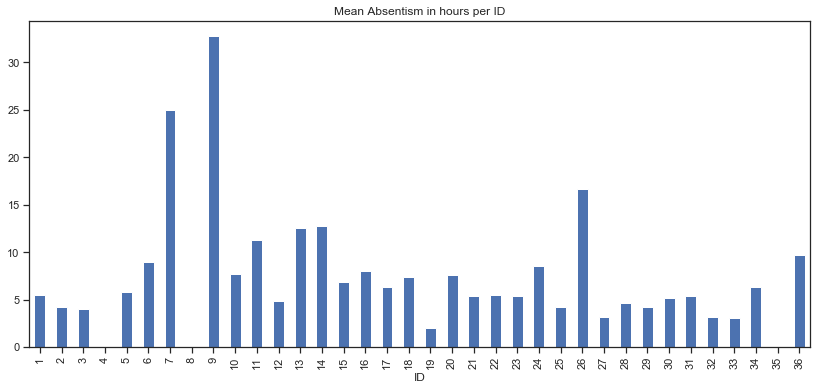

In [23]:
import matplotlib.pyplot as plt
df.groupby('ID')['Absenteeism time in hours'].mean().plot(kind='bar',title='Mean Absentism in hours per ID',figsize=(14,6))
plt.show()

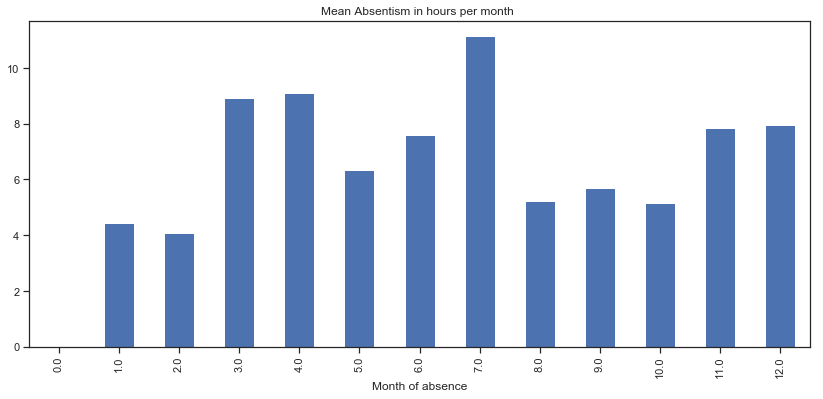

In [24]:
df.groupby('Month of absence')['Absenteeism time in hours'].mean().plot(kind='bar',title='Mean Absentism in hours per month ',figsize=(14,6))
plt.show()

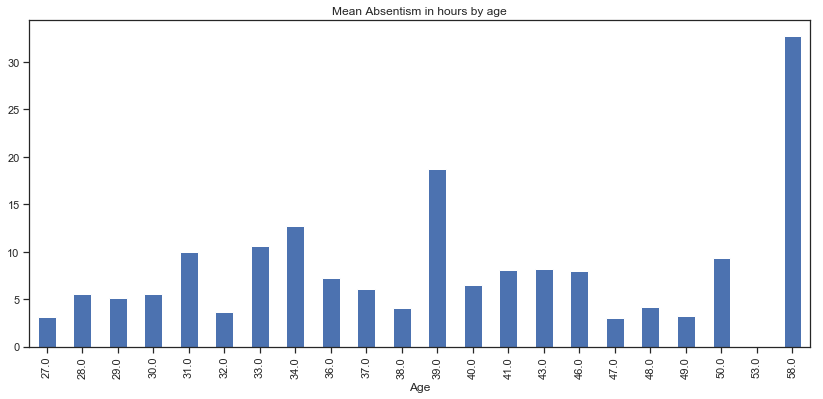

In [25]:
df.groupby('Age')['Absenteeism time in hours'].mean().plot(kind='bar',title='Mean Absentism in hours by age',figsize=(14,6))
plt.show()

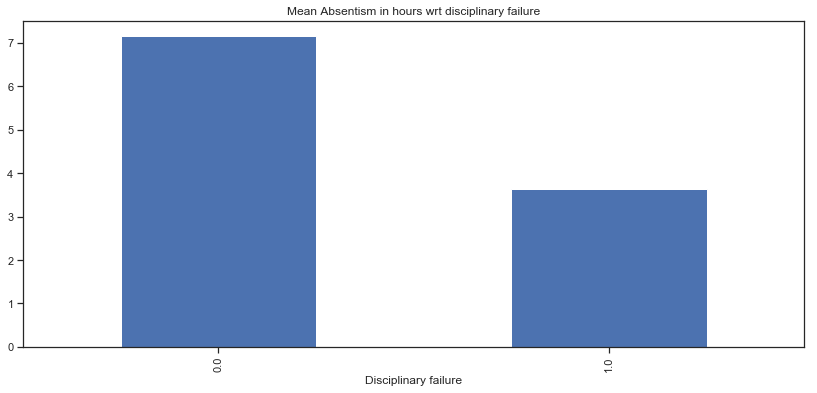

In [26]:
df.groupby('Disciplinary failure')['Absenteeism time in hours'].mean().plot(kind='bar',title='Mean Absentism in hours wrt disciplinary failure',figsize=(14,6))
plt.show()

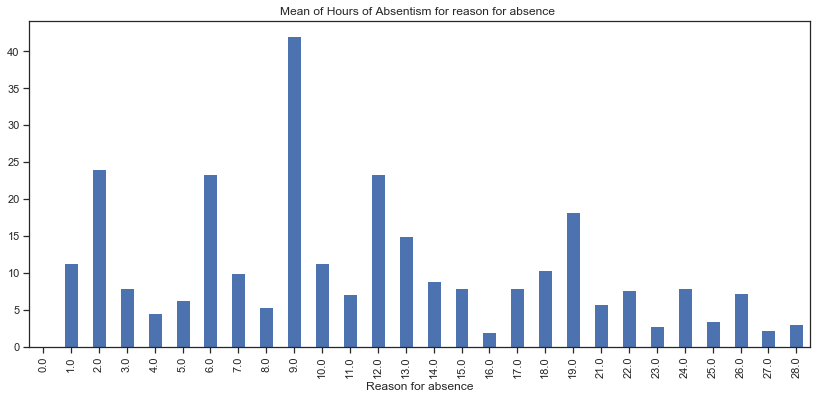

In [27]:
df.groupby('Reason for absence')['Absenteeism time in hours'].mean().plot(kind='bar',title='Mean of Hours of Absentism for reason for absence ',figsize=(14,6))
plt.show()

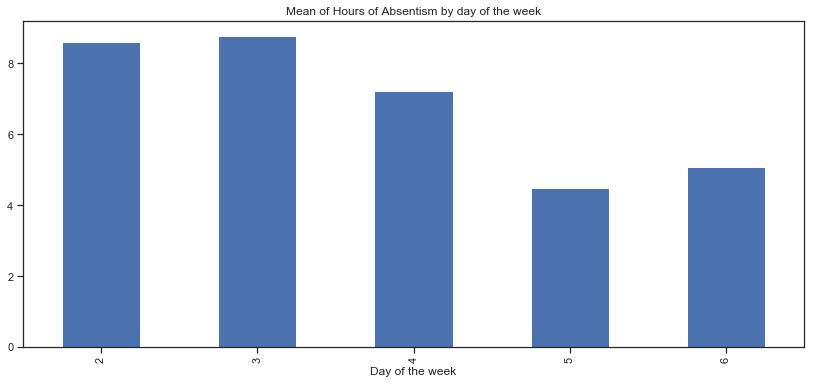

In [28]:
df.groupby('Day of the week')['Absenteeism time in hours'].mean().plot(kind='bar',title='Mean of Hours of Absentism by day of the week',figsize=(14,6))
plt.show()

Transportation expense                AxesSubplot(0.125,0.799681;0.227941x0.0803191)
Distance from Residence to Work    AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Service time                       AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
Age                                   AxesSubplot(0.125,0.703298;0.227941x0.0803191)
Work load Average/day              AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
Hit target                         AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
Son                                   AxesSubplot(0.125,0.606915;0.227941x0.0803191)
Pet                                AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
Weight                             AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
Height                                AxesSubplot(0.125,0.510532;0.227941x0.0803191)
Body mass index                    AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
Absenteeism time in hours          AxesSubplot(0.672059,0.510532;

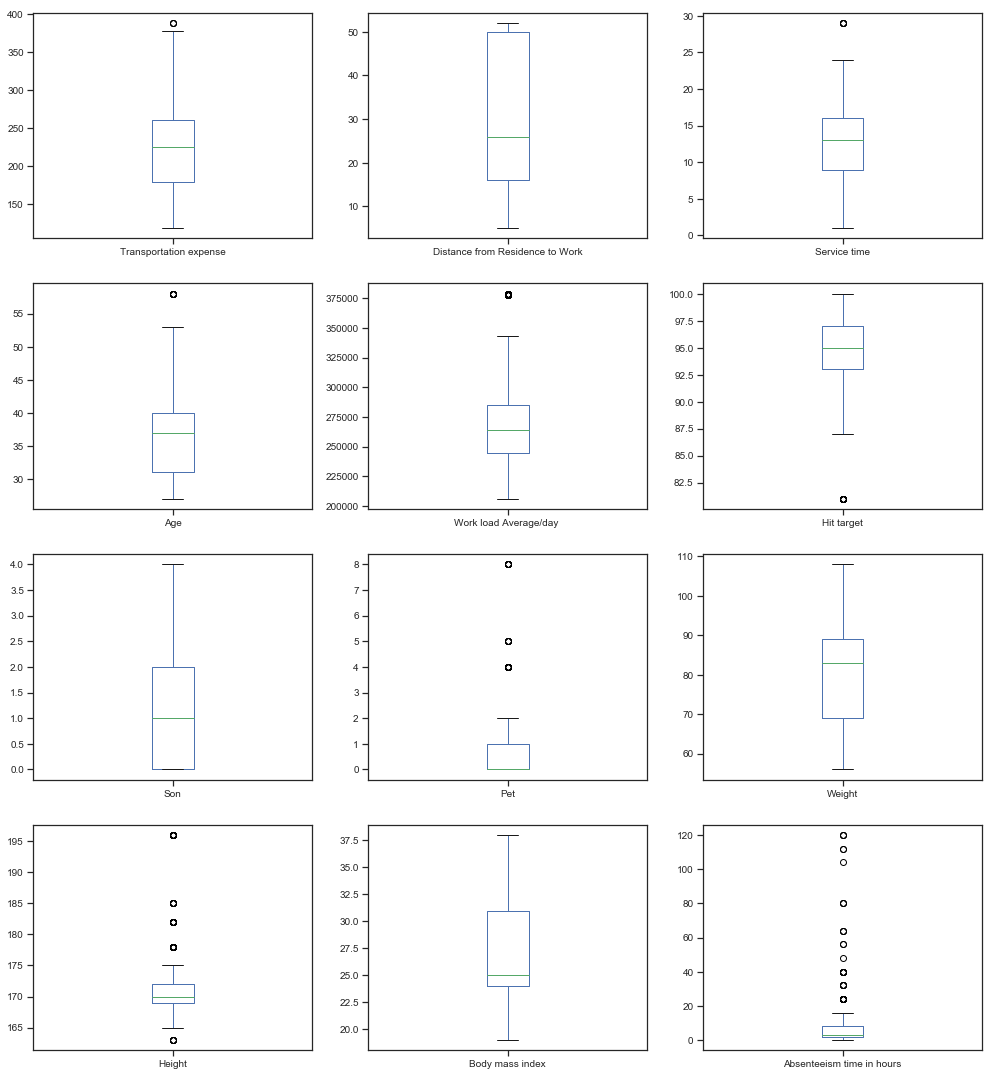

In [29]:
df_num.plot(kind='box', subplots=True,layout=(8,3), figsize=(17,39), fontsize=10)

In [30]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
1,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,4.0
2,36,NaN,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,0.0
3,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,2.0
4,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,4.0
5,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,2.0


In [31]:
df.dtypes

ID                                   object
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                 float64
Social drinker                     category
Social smoker                      category
Pet                                 float64
Weight                              float64
Height                              float64
Absenteeism time in hours           float64
dtype: object

In [32]:
df.isnull().sum()

ID                                  0
Reason for absence                 39
Month of absence                    4
Day of the week                     0
Seasons                             0
Transportation expense              6
Distance from Residence to Work     3
Service time                        3
Age                                 2
Work load Average/day               8
Hit target                          6
Disciplinary failure                5
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Absenteeism time in hours           0
dtype: int64

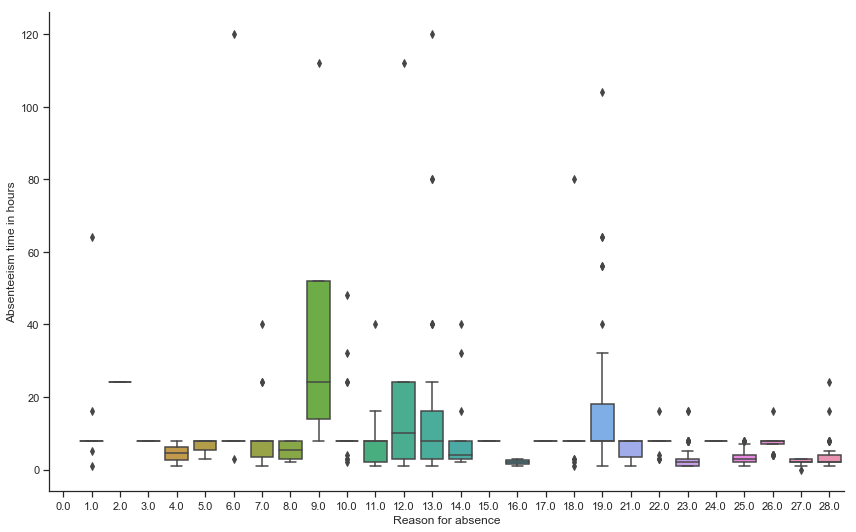

In [33]:
sns.catplot(x='Reason for absence', y="Absenteeism time in hours", kind="box", data=df,height=7.5,aspect=12/7.5)

In [34]:
df = df.fillna(method='ffill')

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=70)
X = df.drop(columns=('Absenteeism time in hours'))
y = df['Absenteeism time in hours']
reg.fit(X, y)

imp_feat = pd.DataFrame({'Feature': df.drop(columns='Absenteeism time in hours').columns,
                         'importance':reg.feature_importances_*100})
imp_feat.sort_values(by = 'importance', ascending=False).reset_index(drop = True)

,Feature,importance
0,Reason for absence,19.058211
1,Day of the week,14.309173
2,Work load Average/day,10.369671
3,Month of absence,10.104709
4,Seasons,7.152137
5,Hit target,5.948064
6,Age,5.285558
7,Distance from Residence to Work,4.297170
8,ID,3.568719
9,Son,3.099603


In [36]:
df_o=df.copy()

In [37]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(df_o.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    df_o.loc[df_o.loc[:,i] < min, i] = np.nan
    df_o.loc[df_o.loc[:,i] > max, i] = np.nan 

Distance from Residence to Work
-35.0
101.0
Service time
-1.5
26.5
Age
17.5
53.5
Work load Average/day 
169642.0
368962.0
Transportation expense
57.5
381.5
Hit target
87.0
103.0
Son
-3.0
5.0
Pet
-1.5
2.5
Weight
39.0
119.0
Height
164.5
176.5
Absenteeism time in hours
-7.0
17.0


In [38]:
missing_val2 = pd.DataFrame(df_o.isnull().sum())
missing_val2

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,3
Distance from Residence to Work,0
Service time,5
Age,8
Work load Average/day,29


In [39]:
cnames_o = ['Absenteeism time in hours']

In [40]:
for i in cnames_o:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    df.loc[df.loc[:,i] < min, i] = np.nan
    df.loc[df.loc[:,i] > max, i] = np.nan

Absenteeism time in hours
-7.0
17.0


In [41]:
missing_val3 = pd.DataFrame(df.isnull().sum())
missing_val3

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
Work load Average/day,0


In [42]:
from fancyimpute import KNN
df = pd.DataFrame(KNN(k = 3).complete(df), columns = df.columns).round(0)

ModuleNotFoundError: No module named 'fancyimpute'

In [43]:
for i in catnames:
    df.loc[:, i] = df.loc[:, i].astype('category')


df.iloc[:, 0] = df.iloc[:, 0].astype(object)

In [44]:
df_num=df.select_dtypes(['float64'])
df_cat=df.select_dtypes(['category'])
df_num = df_num.reset_index(drop=True)
df_num.index += 1
df_cat = df_cat.reset_index(drop=True)
df_cat.index += 1

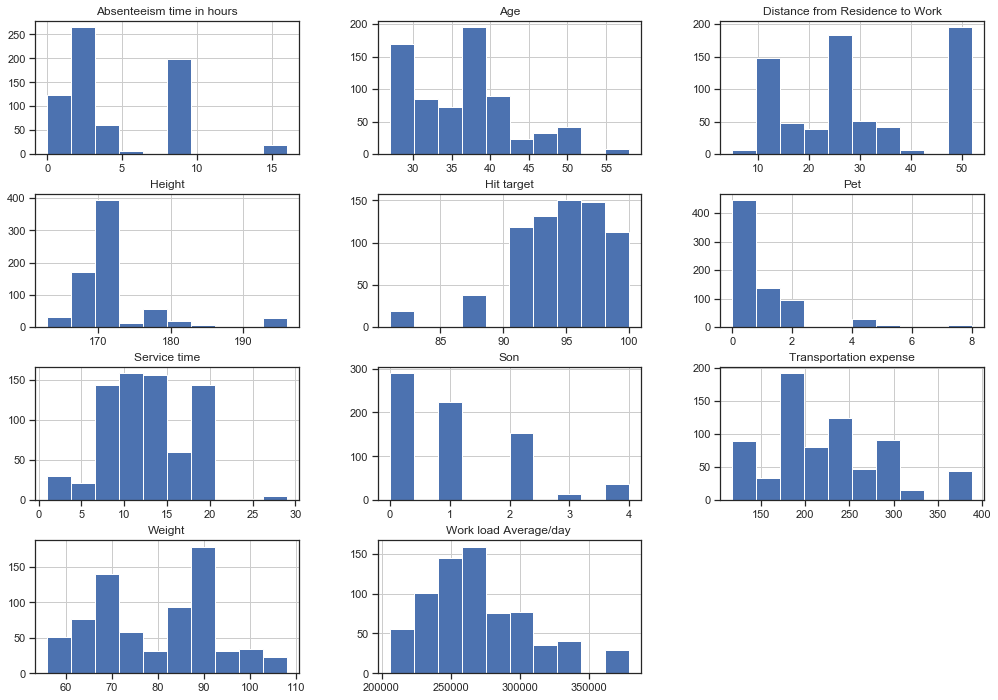

In [45]:
from matplotlib import pyplot
df_num.hist(figsize=(17,12))
pyplot.show()

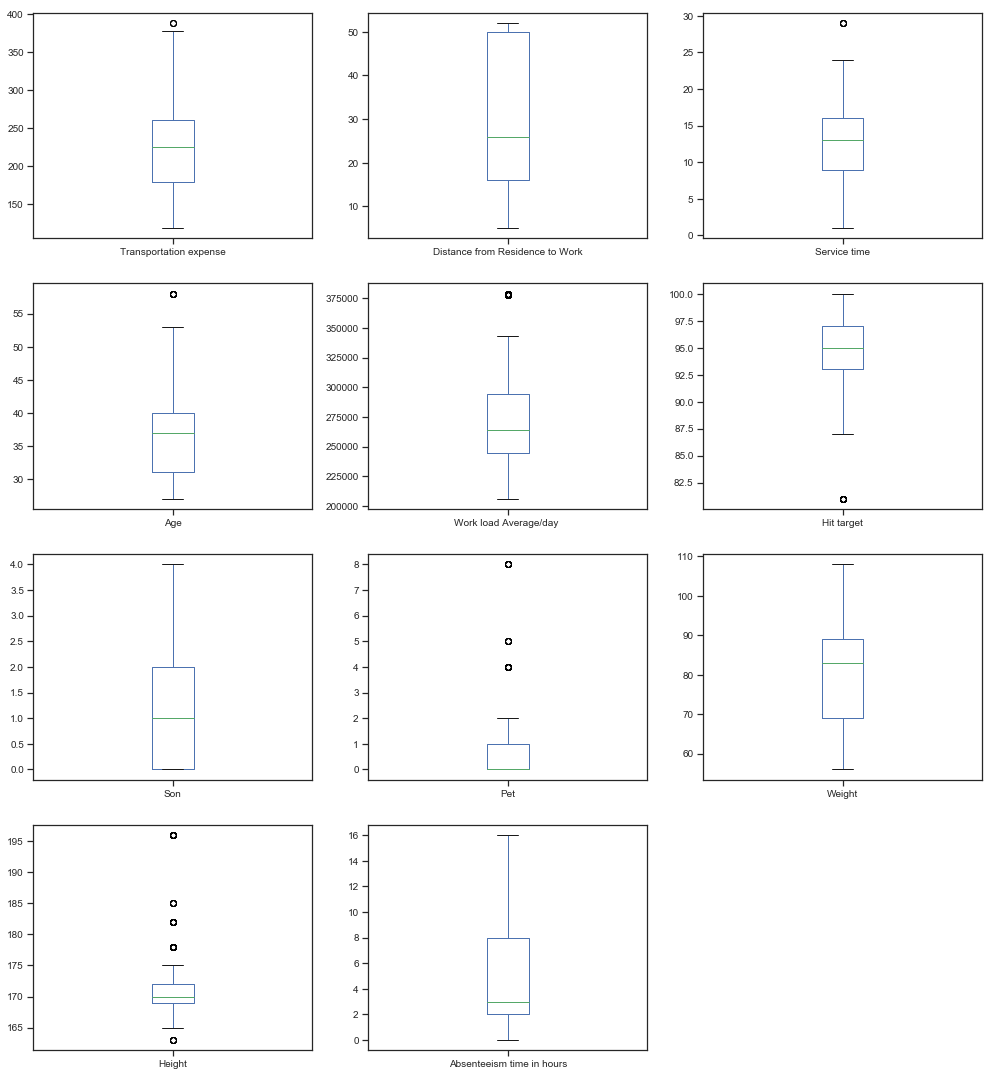

In [46]:
df_num.plot(kind='box', subplots=True,layout=(8,3), figsize=(17,39), fontsize=10)
pyplot.show()

In [47]:
cnames = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Son', 'Pet', 'Weight', 'Height']

In [48]:
for i in cnames:
   
    df[i] = (df[i] - df[i].min())/(df[i].max() - df[i].min())

In [49]:
from sklearn.model_selection import train_test_split
from random import *    
from numpy import *

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [51]:
df1=df.copy()

In [52]:
mylist = list(df.select_dtypes(include=['category']).columns)
dummies = pd.get_dummies(df1[mylist], prefix= mylist,drop_first=True)
df1.drop(mylist, axis=1, inplace = True)
df1 = pd.concat([df1,dummies], axis =1)

In [53]:
random.seed(2)
X = df1.drop(columns=['Absenteeism time in hours','ID'])
y = df1['Absenteeism time in hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [54]:
X_train = X_train.reset_index(drop=True)
X_train.index += 1
X_test = X_test.reset_index(drop=True)
X_test.index += 1
y_train = y_train.reset_index(drop=True)
y_train.index += 1
y_test = y_test.reset_index(drop=True)
y_test.index += 1

In [55]:
df.isnull().any()

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Absenteeism time in hours           True
dtype: bool

In [56]:
import sys
!{sys.executable} -m pip install xgboost

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt
X_train[np.isnan(X_train)] = np.median(X_train[~np.isnan(X_train)])
y_train[np.isnan(y_train)] = np.median(y_train[~np.isnan(y_train)])
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred_train = lr_model.predict(X_train)
y_pred = lr_model.predict(X_test).round(0)

In [58]:
model_lr_dummies = sm.OLS(y_train,X_train).fit()

In [59]:
model_lr_dummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.437
Model:                                   OLS   Adj. R-squared:                  0.371
Method:                        Least Squares   F-statistic:                     6.628
Date:                       Wed, 10 Apr 2019   Prob (F-statistic):           2.11e-35
Time:                               01:31:47   Log-Likelihood:                -1308.5
No. Observations:                        574   AIC:                             2739.
Df Residuals:                            513   BIC:                             3004.
Df Model:                                 60                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Transportation expense              1.3298      0.615      2.162      0.031       0.121       2.538
Distance from Residence to Work     0.0529      0.564      0.094      0.925      -1.054       1.160
Service time                       -0.3797      1.323     -0.287      0.774      -2.979       2.219
Age                                -1.9074      0.806     -2.366      0.018      -3.491      -0.324
Work load Average/day               0.5372      0.623      0.863      0.389      -0.686       1.761
Hit target                          1.1062      1.000      1.106      0.269      -0.858       3.070
Son                                 0.6447      0.498      1.294      0.196      -0.334       1.624
Pet                                -1.7943      0.895     -2.004      0.046      -3.553      -0.036
Weight                              1.4212      0.672      2.115      0.035       0.101       2.741
Height                             -1.9914      0.865     -2.302      0.022      -3.691      -0.292
Reason for absence_1.0              2.6023      0.846      3.076      0.002       0.940       4.265
Reason for absence_2.0             -1.4074      2.592     -0.543      0.587      -6.500       3.685
Reason for absence_3.0              4.2246      2.554      1.654      0.099      -0.793       9.242
Reason for absence_4.0              0.7837      1.872      0.419      0.676      -2.895       4.462
Reason for absence_5.0              2.2377      1.811      1.235      0.217      -1.321       5.797
Reason for absence_6.0              2.8812      1.026      2.809      0.005       0.866       4.896
Reason for absence_7.0              0.1494      0.801      0.187      0.852      -1.423       1.722
Reason for absence_8.0              1.6085      1.168      1.378      0.169      -0.685       3.902
Reason for absence_9.0              3.5971      1.276      2.818      0.005       1.089       6.105
Reason for absence_10.0             2.3217      0.673      3.450      0.001       1.000       3.644
Reason for absence_11.0             0.3129      0.705      0.444      0.657      -1.071       1.697
Reason for absence_12.0             1.8380      1.092      1.684      0.093      -0.307       3.983
Reason for absence_13.0             1.1800      0.552      2.137      0.033       0.095       2.265
Reason for absence_14.0             0.0984      0.773      0.127      0.899      -1.420       1.616
Reason for absence_15.0             3.1517      1.534      2.054      0.040       0.137       6.166
Reason for absence_16.0            -2.2484      1.523     -1.476      0.140      -5.240       0.743
Reason for absence_17.0             3.1412      2.574      1.220      0.223      -1.916       8.198
Reason

In [60]:
train_rmse_lr=sqrt(mean_squared_error(y_train,y_pred_train))
print("train_rmse_lr:")
train_rmse_lr

train_rmse_lr:


2.400535954744672

In [61]:
y_test[np.isnan(y_test)] = np.median(y_test[~np.isnan(y_test)])
y_pred[np.isnan(y_pred)] = np.median(y_pred[~np.isnan(y_pred)])
test_rmse_lr=sqrt(mean_squared_error(y_test,y_pred))
print("test_rmse_lr:")
test_rmse_lr

test_rmse_lr:


3.5794552658190883

In [62]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet, Lars
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

regressors = [DecisionTreeRegressor(),  AdaBoostRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), RandomForestRegressor(),
Ridge(), Lasso(), LinearRegression(), ElasticNet(), Lars(), SVR(), KNeighborsRegressor(),XGBRegressor()]


imp_cols=["regressors", "MSE"]
imp = pd.DataFrame(columns=imp_cols)
for rgr in regressors:
    rgr.fit(X_train, y_train)
    name = rgr.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('Result-test')
    train_predictions = rgr.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, train_predictions))
    print("RMSE: {}".format(mse))
    print('Result-train')
    ori_predictions = rgr.predict(X_train)
    mse_t = np.sqrt(mean_squared_error(y_train, ori_predictions))
    print("RMSE: {}".format(mse_t))
    
    print("="*50)
    imp_entry = pd.DataFrame([[name, mse]], columns=imp_cols)
    imp = imp.append(imp_entry)
    


DecisionTreeRegressor
Result-test
RMSE: 4.322056195040321
Result-train
RMSE: 0.33844798467050463
AdaBoostRegressor
Result-test
RMSE: 3.6679531716534783
Result-train
RMSE: 2.755828912162833
GradientBoostingRegressor
Result-test
RMSE: 3.446134449348902
Result-train
RMSE: 2.041512367375805
ExtraTreesRegressor
Result-test
RMSE: 3.7244339407502376
Result-train
RMSE: 0.33844798467050463
RandomForestRegressor
Result-test
RMSE: 3.551256689409268
Result-train
RMSE: 1.1883904775042762
Ridge
Result-test
RMSE: 3.5328913397820547
Result-train
RMSE: 2.371023533268171
Lasso
Result-test
RMSE: 4.042526325822377
Result-train
RMSE: 3.1507256430999555
LinearRegression
Result-test
RMSE: 3.575346247630802
Result-train
RMSE: 2.400535954744672
ElasticNet
Result-test
RMSE: 4.042526325822377
Result-train
RMSE: 3.1507256430999555
Lars
Result-test
RMSE: 3.5362479121825525
Result-train
RMSE: 2.3663533030479655

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 61 iterations, i.e. alpha=4.580e-04, with an active set of 59 regressors, and the smallest cholesky pivot element being 9.657e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 62 iter


SVR
Result-test
RMSE: 4.140218622101829
Result-train
RMSE: 3.019331338438915
KNeighborsRegressor
Result-test
RMSE: 3.7169656083065035
Result-train
RMSE: 2.4336348118015865


C:\Users\ASUS\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor
Result-test
RMSE: 3.51225038382033
Result-train
RMSE: 2.075981474963122


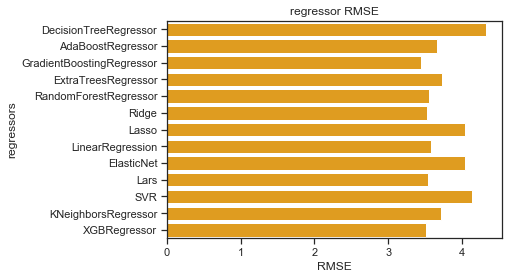

In [63]:
sns.set_color_codes("muted")
sns.barplot(x='MSE', y='regressors', data=imp, color="orange")

plt.xlabel('RMSE')
plt.title('regressor RMSE')
plt.show()

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


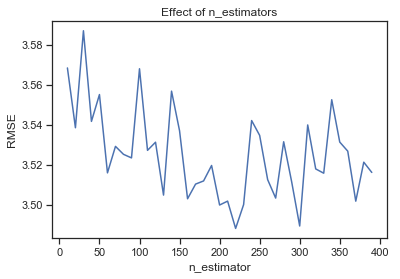

In [64]:
rf_model = RandomForestRegressor().fit(X_train, y_train)
estimators = np.arange(10, 400, 10)
scores = []

for n in estimators:
    rf_model.set_params(n_estimators=n)
    forest=rf_model.fit(X_train,y_train)
    train_predictions_y = forest.predict(X_test)
    scores.append(np.sqrt(mean_squared_error(y_test, train_predictions_y)))

plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("RMSE")
plt.plot(estimators, scores)

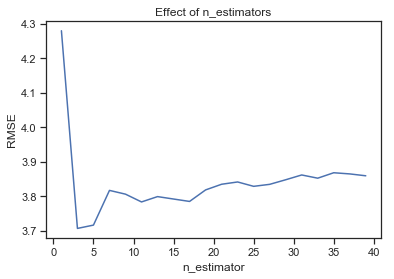

In [65]:
KNN_model=KNeighborsRegressor().fit(X_train, y_train)
estimators = np.arange(1, 41, 2)
scores = []

for n in estimators:
    KNN_model.set_params(n_neighbors=n)
    KNN=KNN_model.fit(X_train,y_train)
    train_predictions_y = KNN.predict(X_test)
    scores.append(np.sqrt(mean_squared_error(y_test, train_predictions_y)))

plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("RMSE")
plt.plot(estimators, scores)

In [66]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
1,11,26.0,7.0,3,1,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,1.0,0.50,1.0,0.0,0.125,0.653846,0.272727,4.0
2,36,26.0,7.0,3,1,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,1.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.0
3,3,23.0,7.0,4,1,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,1.0,0.00,1.0,0.0,0.000,0.634615,0.212121,2.0
4,7,7.0,7.0,5,1,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,1.0,0.50,1.0,1.0,0.000,0.230769,0.151515,4.0
5,11,23.0,7.0,5,1,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,1.0,0.50,1.0,0.0,0.125,0.653846,0.272727,2.0


In [67]:
monthly_absence = df.groupby('Month of absence')['Absenteeism time in hours'].sum()
monthly_absence

Month of absence
0.0       0.0
1.0     166.0
2.0     270.0
3.0     405.0
4.0     210.0
5.0     232.0
6.0     211.0
7.0     340.0
8.0     232.0
9.0     156.0
10.0    279.0
11.0    223.0
12.0    182.0
Name: Absenteeism time in hours, dtype: float64

In [68]:
monthly_absence = monthly_absence.iloc[1:]

In [69]:
monthly_absence

Month of absence
1.0     166.0
2.0     270.0
3.0     405.0
4.0     210.0
5.0     232.0
6.0     211.0
7.0     340.0
8.0     232.0
9.0     156.0
10.0    279.0
11.0    223.0
12.0    182.0
Name: Absenteeism time in hours, dtype: float64

In [70]:
monthly_absence = monthly_absence.reset_index()
monthly_absence

,Month of absence,Absenteeism time in hours
0,1.0,166.0
1,2.0,270.0
2,3.0,405.0
3,4.0,210.0
4,5.0,232.0
5,6.0,211.0
6,7.0,340.0
7,8.0,232.0
8,9.0,156.0
9,10.0,279.0


In [71]:
monthly_absence['absenteeism hours per month'] = monthly_absence['Absenteeism time in hours']/3

In [72]:
monthly_absence['Month of absence'] = monthly_absence['Month of absence'].astype('int')
monthly_absence

,Month of absence,Absenteeism time in hours,absenteeism hours per month
0,1,166.0,55.333333
1,2,270.0,90.000000
2,3,405.0,135.000000
3,4,210.0,70.000000
4,5,232.0,77.333333
5,6,211.0,70.333333
6,7,340.0,113.333333
7,8,232.0,77.333333
8,9,156.0,52.000000
9,10,279.0,93.000000


In [73]:
monthly_absence = monthly_absence.set_index('Month of absence')

In [74]:
monthly_absence = monthly_absence.drop(['Absenteeism time in hours'],axis=1)

In [77]:
ts = monthly_absence['absenteeism hours per month']
ts

Month of absence
1      55.333333
2      90.000000
3     135.000000
4      70.000000
5      77.333333
6      70.333333
7     113.333333
8      77.333333
9      52.000000
10     93.000000
11     74.333333
12     60.666667
Name: absenteeism hours per month, dtype: float64

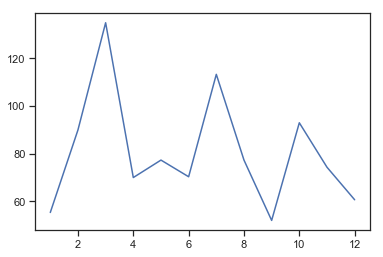

In [78]:
plt.plot(ts)

In [79]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ts,autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Test Statistic                -2.176149
p-value                        0.215015
#Lags Used                     2.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64

In [80]:
ts_log = np.log(ts)

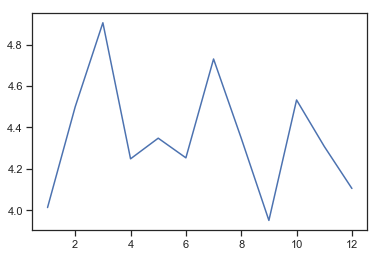

In [81]:
plt.plot(ts_log)

In [82]:
ts_diff = ts_log - ts_log.shift()
ts_diff

Month of absence
1          NaN
2     0.486434
3     0.405465
4    -0.656780
5     0.099630
6    -0.094879
7     0.477087
8    -0.382208
9    -0.396881
10    0.581356
11   -0.224040
12   -0.203165
Name: absenteeism hours per month, dtype: float64

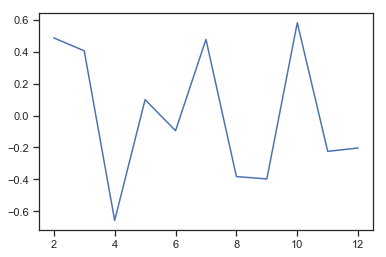

In [83]:
plt.plot(ts_diff)

In [84]:
ts_diff.fillna(0,inplace=True)

In [85]:
dftest = adfuller(ts_diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     6.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64

In [86]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=10)
lag_pacf = pacf(ts_diff, nlags=10, method='ols')

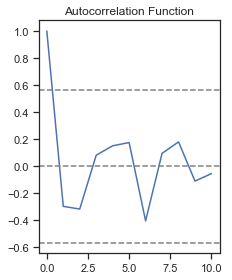

In [87]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()

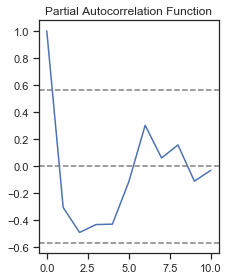

In [88]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [89]:
from statsmodels.tsa.arima_model import ARIMA

In [90]:
model = ARIMA(ts_diff, order=(3, 0, 0))

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [91]:
results_AR = model.fit(disp=-1)

In [92]:
results_AR.fittedvalues

Month of absence
1    -0.007893
2    -0.010029
3    -0.224330
4    -0.760042
5    -0.153289
6     0.201143
7     0.373474
8    -0.384739
9    -0.069632
10    0.316198
11    0.089295
12   -0.095445
dtype: float64

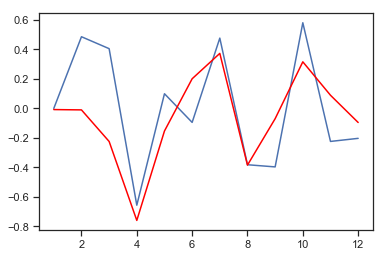

In [93]:
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')

In [94]:
RSS = (results_AR.fittedvalues-ts_diff)**2
RSS.fillna(0,inplace=True)
sum(RSS)

1.10336574991545

In [95]:
preds = results_AR.predict(start=12,end=24)

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [96]:
preds

12   -0.036433
13    0.315178
14   -0.117790
15   -0.177696
16    0.018798
17    0.183686
18   -0.076509
19   -0.133004
20    0.030191
21    0.110995
22   -0.056477
23   -0.094177
24    0.027683
dtype: float64

In [97]:
preds = preds[1:]

In [98]:
predictions_ARIMA_diff = preds

In [99]:
predictions_ARIMA_diff

13    0.315178
14   -0.117790
15   -0.177696
16    0.018798
17    0.183686
18   -0.076509
19   -0.133004
20    0.030191
21    0.110995
22   -0.056477
23   -0.094177
24    0.027683
dtype: float64

In [100]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [101]:
ts_diff

Month of absence
1     0.000000
2     0.486434
3     0.405465
4    -0.656780
5     0.099630
6    -0.094879
7     0.477087
8    -0.382208
9    -0.396881
10    0.581356
11   -0.224040
12   -0.203165
Name: absenteeism hours per month, dtype: float64

In [102]:
predictions_ARIMA_diff_cumsum

13    0.315178
14    0.197387
15    0.019692
16    0.038489
17    0.222176
18    0.145667
19    0.012663
20    0.042853
21    0.153849
22    0.097372
23    0.003195
24    0.030878
dtype: float64

In [103]:
predictions_ARIMA_log = pd.Series(4.8, index=range(13,25))
predictions_ARIMA_log
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

In [104]:
sum(ts_log)/12

4.353715135265693

In [105]:
predictions_ARIMA_log

13    5.115178
14    4.997387
15    4.819692
16    4.838489
17    5.022176
18    4.945667
19    4.812663
20    4.842853
21    4.953849
22    4.897372
23    4.803195
24    4.830878
dtype: float64

In [106]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

In [107]:
predictions_ARIMA

13    166.530347
14    148.025922
15    123.926884
16    126.278445
17    151.741103
18    140.564534
19    123.058836
20    126.830739
21    141.719328
22    133.937282
23    121.899222
24    125.320960
dtype: float64

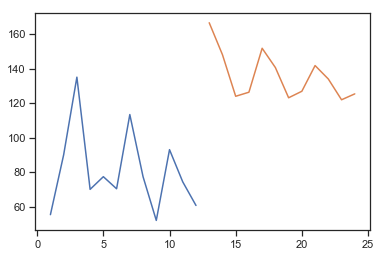

In [108]:
plt.plot(ts)
plt.plot(predictions_ARIMA)